# Plot average hdf5 traces from multiple sources

<span style="color:red">IMPORTANT</span> - This notebook reads HDF5 files. Always PAUSE Sequencer.vi to run analysis for current sequence (HDF5 r/w conflict)!

### Configure IPython

In [11]:
#import python packages
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator
import oskar

## Import data

### dataset #0

In [2]:
rid_0 = '20160429_113914'
h5_0 = oskar.H5Data(rid_0)              # dataset #0
h5_0.load_log()
vDF_0 = h5_0.var_df()
out_dire = h5_0.out_dire("Traces")    # output
h5_0.pprint()

20160429_113914
   Author:	 AA
   Description:  n = 10 low res lineshape


In [3]:
vDF_0[vDF_0.IR == 758.9336]

,DLY_EA,IR,VOL_u101,VOL_u104,WAV
SQUID,,,,,
2,6.350000e-07,758.9336,2200,2200,243.2
46,6.350000e-07,758.9336,2200,2200,243.2
67,6.350000e-07,758.9336,2200,2200,243.2


In [4]:
# data
ftype_0 = 'CH_A0'
squids_0 = [2, 46, 67]
trace_0, info_0 = h5_0.load_array(squids_0, ftype_0)
print(np.shape(trace_0))
pprint.pprint(info_0)

(179L, 2858L)
{u'Manufacturer': 'Agilent',
 u'Model': 'DSO6104A,MY51510237,06.17.0001\n',
 u'dt': 3.5000000000000003e-09,
 u'input impedance': '50 ohms',
 u'name': 'Channel 1',
 u'probe attenuation': 1.0,
 u't0': 2.9999999999995308e-07,
 u'vertical coupling': 'DC',
 u'vertical offset': -0.035000000000000003,
 u'vertical range': 0.080000000000000002}


### dataset #1

In [5]:
rid_1 = '20160429_113914'
h5_1 = oskar.H5Data(rid_1)              # dataset #1
h5_1.load_log()
vDF_1 = h5_1.var_df()
h5_1.pprint()

20160429_113914
   Author:	 AA
   Description:  n = 10 low res lineshape


In [6]:
vDF_0[vDF_0.IR == 759.1086]

,DLY_EA,IR,VOL_u101,VOL_u104,WAV
SQUID,,,,,
17,6.350000e-07,759.1086,2200,2200,243.2
51,6.350000e-07,759.1086,2200,2200,243.2


In [7]:
# data
ftype_1 = 'CH_A0'
squids_1 = [17, 51]
trace_1, info_1 = h5_1.load_array(squids_1, ftype_1)
print(np.shape(trace_1))
pprint.pprint(info_1)

(116L, 2858L)
{u'Manufacturer': 'Agilent',
 u'Model': 'DSO6104A,MY51510237,06.17.0001\n',
 u'dt': 3.5000000000000003e-09,
 u'input impedance': '50 ohms',
 u'name': 'Channel 1',
 u'probe attenuation': 1.0,
 u't0': 2.9999999999995308e-07,
 u'vertical coupling': 'DC',
 u'vertical offset': -0.035000000000000003,
 u'vertical range': 0.080000000000000002}


## Average traces

In [8]:
# get x-axis values
scale = 1E-9 #convert to nano seconds
points_0 = len(trace_0[0])
x_vals_0 = (np.arange(points_0)*info_0['dt'])/scale
points_1 = len(trace_1[0])
x_vals_1 = (np.arange(points_1)*info_1['dt'])/scale

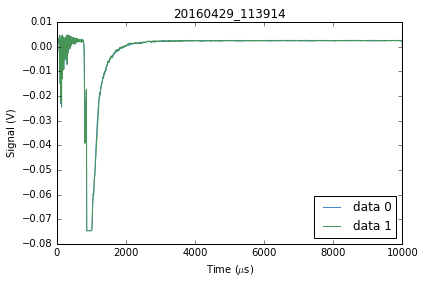

In [9]:
# plot setup
fig, ax = plt.subplots(1, 1)
#data
y_vals_0 = np.mean(trace_0, axis=0)
ax.plot(x_vals_0, y_vals_0, label='data 0', c=oskar.colors[0])

y_vals_1 = np.mean(trace_1, axis=0)
ax.plot(x_vals_1, y_vals_1, label='data 1', c=oskar.colors[1])

# labels
ax.set_title(rid_0)    
ax.set_xlabel(r'Time ($\mu$s)')  
ax.set_ylabel('Signal (V)')    
ax.legend(loc=0)

#output
plt.tight_layout()
fileout = os.path.join(out_dire, ftype_0+"_av.png")
plt.savefig(fileout, dpi=300)
plt.show()

## Background subtraction

If the x-scales are the same it's trivial to subtract one trace from the other.

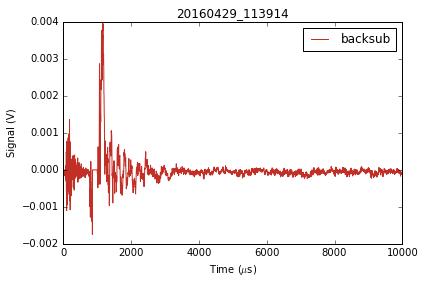

In [10]:
# plot setup
fig, ax = plt.subplots(1, 1)
#data
ax.plot(x_vals_1, y_vals_0 - y_vals_1, label='backsub', c=oskar.colors[2])

# labels
ax.set_title(rid_0)    
ax.set_xlabel(r'Time ($\mu$s)')  
ax.set_ylabel('Signal (V)')    
ax.legend(loc=0)

#output
plt.tight_layout()
fileout = os.path.join(out_dire, ftype_0+"_bs.png")
plt.savefig(fileout, dpi=300)
plt.show()